In [2]:
%load_ext autoreload
%autoreload 2

# IMPORTS

In [3]:
import os
from dotenv import load_dotenv

# data
import numpy as np
import pandas as pd

# eda
import missingno as msng
import sweetviz as sv

from src.general.io import from_pickle
from src.visualization.plotting import plot_moments_histogram

/Users/babenyshev/Desktop/_repositories/personal/leetcode/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# PATHS & NAMES

In [4]:
load_dotenv()

True

# DATA

In [15]:
channels_internal = {"ČT1",
"ČT2",
"Nova",
"Prima",
"ČT24",
"ČT sport",
"Nova Cinema",
"Prima COOL",
"Prima love",
"TV Barrandov",
"Nova Action",
"ČT :D",
"Nova Fun",
"Prima ZOOM",
"Nova Gold",
"ČT art",
"KINO Barrandov",
"Barrandov KRIMI",
"Barrandov NEWS",
"Prima MAX",
"Prima KRIMI",
"Eurosport1",
"CNN Prima News",
"ČT3",
"Prima STAR",
"Nova Lady",
"Prima SHOW"}

In [5]:
h = "datum_sledovani	na_start_dttm	na_end_dttm	stanice	bcst_plan_item_nm	doba_sledovani	IMDB	zanr	bcst_plan_item_id	Sledovani_zive	Typ_sledovani	Zacatek_Programu	Konec_Programu	TS_Live_min	Zarizeni	Zarizeni_det	MSISDN	Gender	Vek	Tarif	Zakaznik_obec	Zakaznik_okres	Zakaznik_kraj	o2_spolu	bundle_size".split()
f = "o2_sample"
data = pd.read_csv(".."+os.getenv("EXTERNAL_DATA_DIR")+f"/{f}.CSV", on_bad_lines="skip", names=h)

In [34]:
channels_o2 = set(data["stanice"])

In [39]:
channels_o2 = set(data.loc[data["stanice"].str.contains("ČT", na=False)]["stanice"])
channels_o2

{'ČT 1 Jih',
 'ČT 1 Sever',
 'ČT :D / ČT art',
 'ČT Sport',
 'ČT1',
 'ČT1 JZC',
 'ČT1 SVC',
 'ČT2',
 'ČT24'}

# MISSINGS

<Axes: >

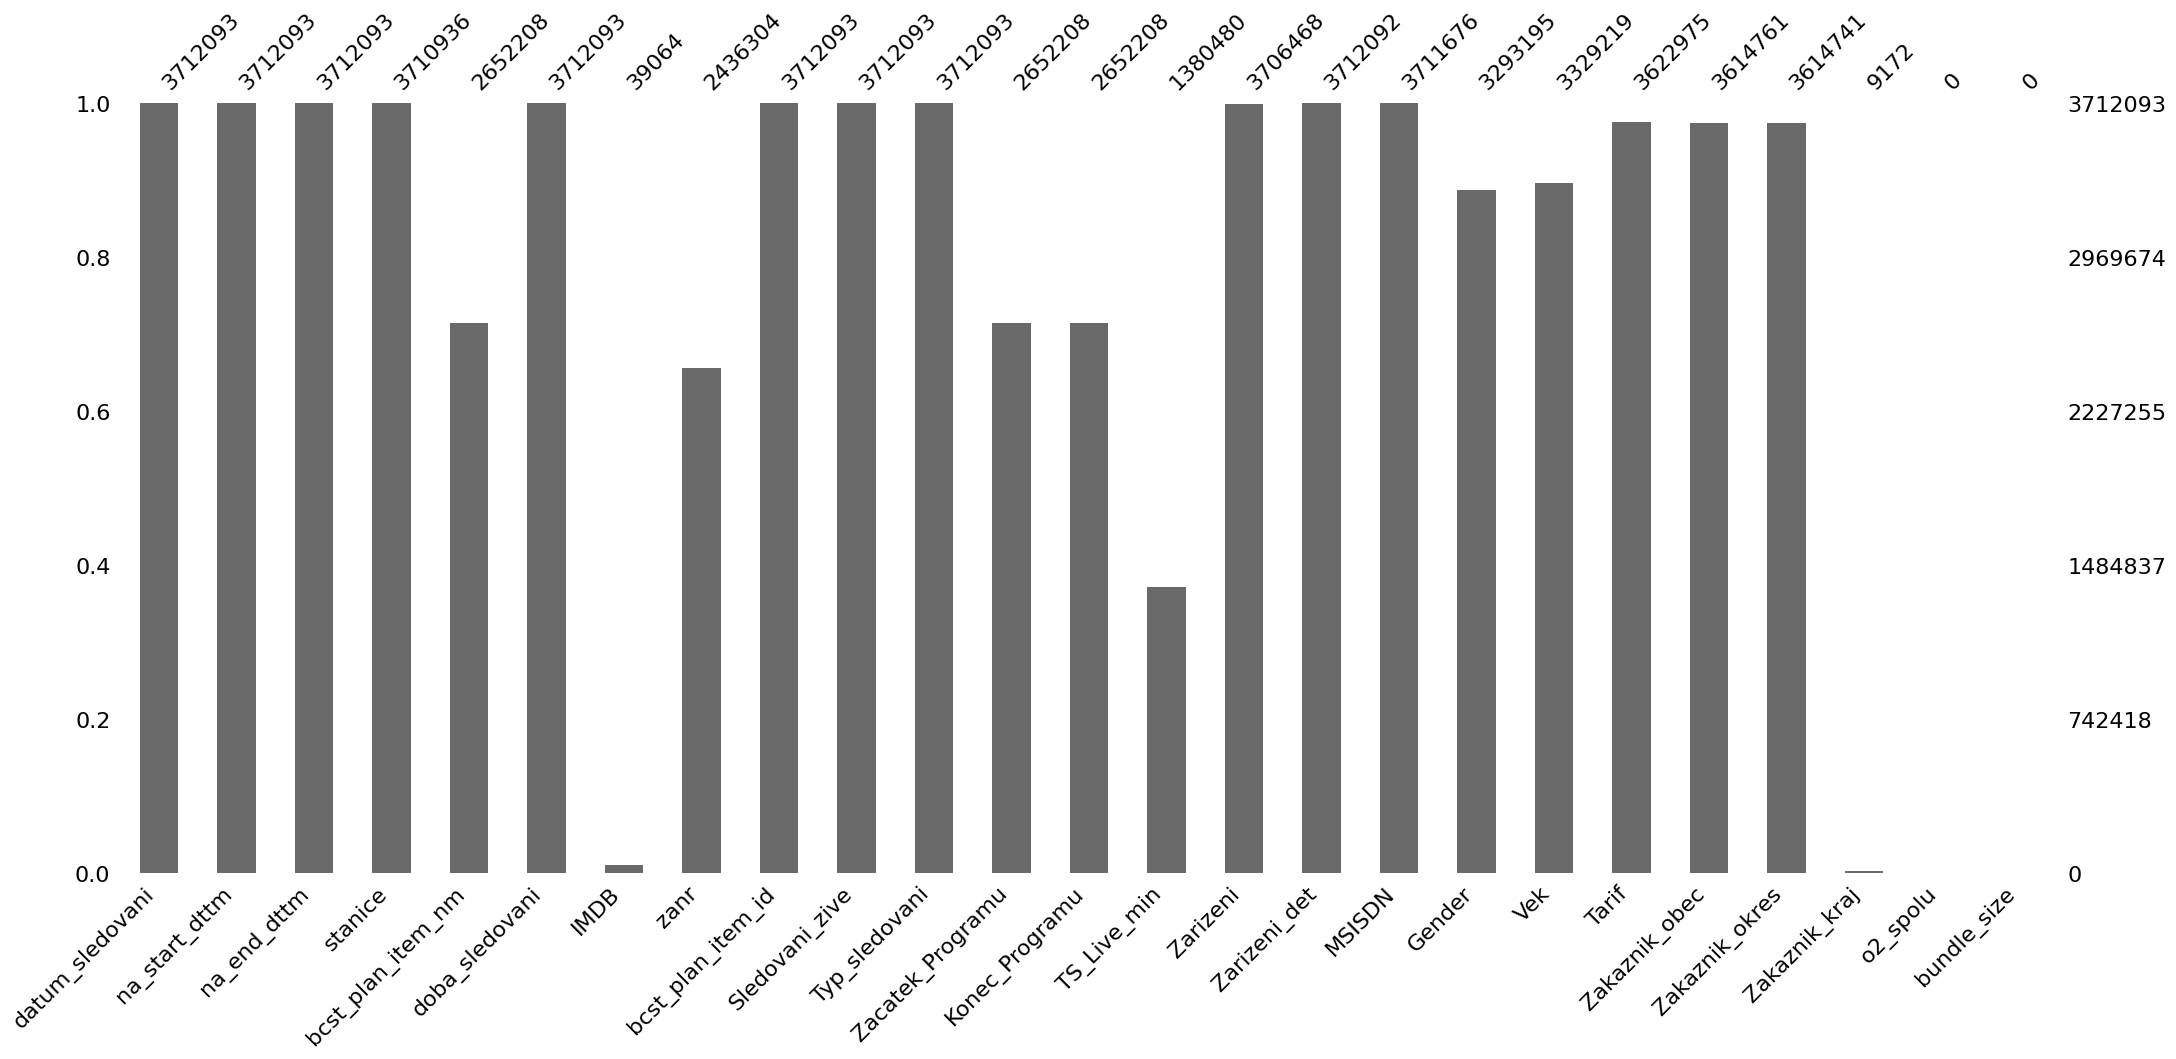

In [6]:
msng.bar(data)

In [7]:
data.head()

,datum_sledovani,na_start_dttm,na_end_dttm,stanice,bcst_plan_item_nm,doba_sledovani,IMDB,zanr,bcst_plan_item_id,Sledovani_zive,...,Zarizeni_det,MSISDN,Gender,Vek,Tarif,Zakaznik_obec,Zakaznik_okres,Zakaznik_kraj,o2_spolu,bundle_size
0,2024-11-24,2024-11-24 03:05:52,2024-11-24 04:05:55,JOJ Family,U nás doma,60.05,NaN,Komedie,18574781,Ne,...,Samsung_STV,126298890,m,47,O2 Internet MAX Stříbrný s O2 TV,Ústí nad Orlicí,Pardubický kraj,NaN,NaN,NaN
1,2024-11-24,2024-11-24 16:50:00,2024-11-24 16:57:10,ČT Sport,"Kvalifikace na ME mužů 2025, Basketbal",7.17,NaN,živě,18580627,Ano,...,LG_STV,122254470,m,44,O2 Spolu pro dva,Sokolov,Karlovarský kraj,NaN,NaN,NaN
2,2024-11-24,2024-11-24 15:20:13,2024-11-24 15:25:10,ČT1,StarDance XIII ...kolem dokola,4.95,NaN,Publicistický,18580680,Ne,...,NG STB,864870,m,49,O2 Spolu pro jednoho,Nový Jičín,Moravskoslezský kraj,NaN,NaN,NaN
3,2024-11-24,2024-11-24 21:51:58,2024-11-24 22:49:58,Nova Fun,Přátelé IX,58.00,NaN,Komedie,18583460,Ano,...,LG_STV,131423250,f,58,O2 Spolu pro jednoho,Nový Jičín,Moravskoslezský kraj,NaN,NaN,NaN
4,2024-11-24,2024-11-24 09:23:51,2024-11-24 10:17:02,ČT24,Týden v politice,53.18,NaN,Publicistický,18580441,Ano,...,ZTE STB,130507050,m,23,O2 TV Air Stříbrná,Karlovy Vary,Karlovarský kraj,NaN,NaN,NaN


# EDA

In [8]:
report = sv.analyze(data)
report.show_html(".."+os.getenv("REPORT_DIR")+"/o2_report.html", open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/o2_report.html was generated.


In [9]:
# report.show_notebook()